# TITANIC DATA ANALYSIS

### IMPORTING DATA LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
titanic_df = pd.DataFrame(pd.read_csv('/content/train.csv'))

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Variable Description
* PassengerId : unique id number to each passenger
* Survived : passenger survive(1) died(0)
* Pclass : passenger class
* Name : name
* Sex : gender of passenger
* Age : age of passenger
* SibSp : number of siblings/spouses
* Parch : number of parents/children
* Ticket : ticket number
* Fare : amount of money spent on ticket
* Cabin : cabin category
* Embarked : port where passenger embarked (C = * Cherbourg, Q = Queenstown, S = Southampton)


### ABOUT DATASET

In [4]:
print("The size of dataset is ",(titanic_df.shape))

The size of dataset is  (891, 12)


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### CLEANING THE DATASET

In [6]:
# Checking for NULL
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Missing values
null_df=pd.DataFrame()
null_df['Features']=titanic_df.isnull().sum().index
null_df['Null values']=titanic_df.isnull().sum().values
null_df['% Null values']=(titanic_df.isnull().sum().values / titanic_df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)

,Features,Null values,% Null values
10,Cabin,687,77.104377
5,Age,177,19.865320
11,Embarked,2,0.224467
0,PassengerId,0,0.000000
1,Survived,0,0.000000
2,Pclass,0,0.000000
3,Name,0,0.000000
4,Sex,0,0.000000
6,SibSp,0,0.000000
7,Parch,0,0.000000


In [9]:
# We can see that there are around 77% missing values in the cabin column
# We will drop Cabin column 
titanic_df.drop(columns='Cabin' , inplace=True)

In [10]:
titanic_df.shape

(891, 11)

In [11]:
# Here we just remove only the Embarked columns with null
titanic_df.dropna(subset=['Embarked'],inplace=True)

In [12]:
titanic_df.shape

(889, 11)

In [13]:
# Almost 19% of AGE is null. If we remove it, there could be alot of data loss.
# So we replace NULL value of age with median value.
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].median())

In [14]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Variable Analysis

There are 2 types of variables in dataset
* Categorical Variable : Survived, Sex, PClass, Embarked, Cabin, Name, Ticket, Sibsp and Parch
* Numerical Variable : Fare, age and passengerId

# Categorical Variable

## FREQUENCY OF SURVIVERS

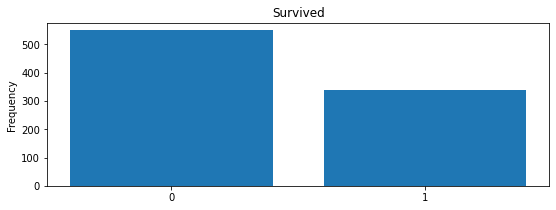

Survived: 
 0    549
1    340
Name: Survived, dtype: int64


In [15]:
var = titanic_df["Survived"] 
#count number of categorical variable(value/sample)
value_count = var.value_counts()
plt.figure(figsize = (9,3))
plt.bar(value_count.index,value_count)
plt.xticks(value_count.index, value_count.index.values)
plt.ylabel("Frequency")
plt.title("Survived")
plt.show()
print("{}: \n {}".format("Survived",value_count))


## FREQUENCY OF GENDER

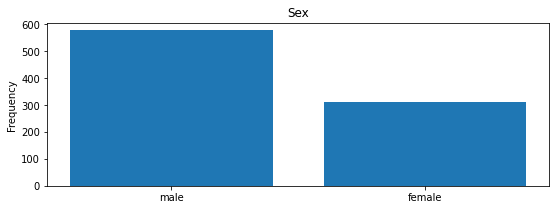

Sex: 
 male      577
female    312
Name: Sex, dtype: int64


In [16]:
var = titanic_df["Sex"]
#count number of categorical variable(value/sample)
value_count = var.value_counts()
plt.figure(figsize = (9,3))
plt.bar(value_count.index,value_count)
plt.xticks(value_count.index, value_count.index.values)
plt.ylabel("Frequency")
plt.title("Sex")
plt.show()
print("{}: \n {}".format("Sex",value_count))

## FREQUENCY OF PASSENGERS CLASS

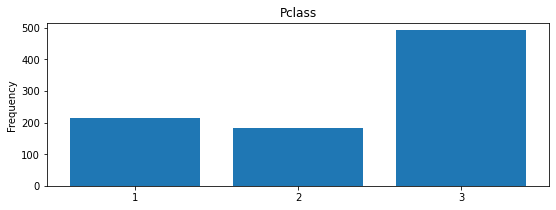

Pclass: 
 3    491
1    214
2    184
Name: Pclass, dtype: int64


In [17]:
var = titanic_df["Pclass"]
#count number of categorical variable(value/sample)
value_count = var.value_counts()
plt.figure(figsize = (9,3))
plt.bar(value_count.index,value_count)
plt.xticks(value_count.index, value_count.index.values)
plt.ylabel("Frequency")
plt.title("Pclass")
plt.show()
print("{}: \n {}".format("Pclass",value_count))

## FREQUENCY OF PASSENGERS WHO ARE ALONE

In [18]:
titanic_df["FamilySize"] = titanic_df["SibSp"]+ titanic_df['Parch']
titanic_df["Alone"] = [0 if titanic_df['FamilySize'][i]>0 else 1 for i in titanic_df.index]

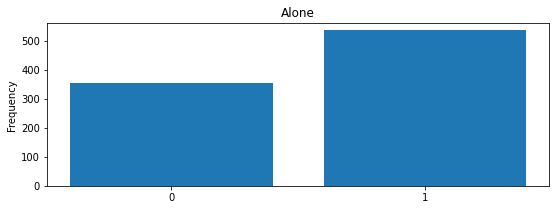

Alone: 
 1    535
0    354
Name: Alone, dtype: int64
0: Died  1:Alive


In [19]:
var = titanic_df["Alone"]
#count number of categorical variable(value/sample)
value_count = var.value_counts()
plt.figure(figsize = (9,3))
plt.bar(value_count.index,value_count)
plt.xticks(value_count.index, value_count.index.values)
plt.ylabel("Frequency")
plt.title("Alone")
plt.show()
print("{}: \n {}".format("Alone",value_count))
print("0: Died  1:Alive")

## Numerical Variable

## FREQUENCY OF AGE

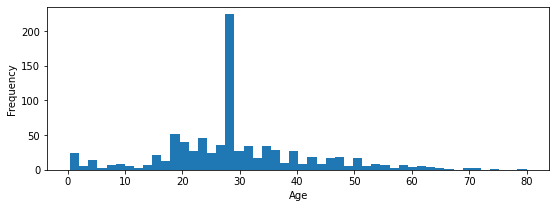

In [20]:
plt.figure(figsize = (9,3))
plt.hist(titanic_df["Age"],bins=50)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## FREQUENCY OF PASSENGERS BY FARE

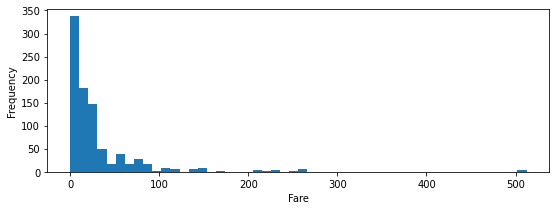

In [21]:
plt.figure(figsize = (9,3))
plt.hist(titanic_df["Fare"],bins=50)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

# CONCULSIONS

## Probability of Survivers based on Passengers Class

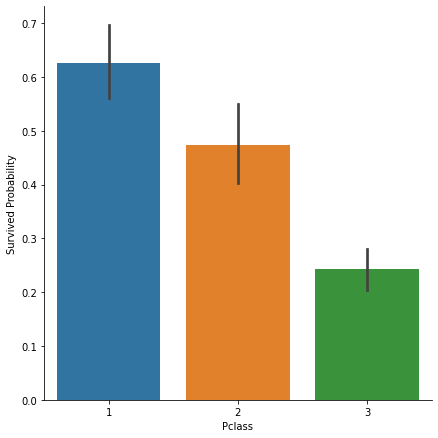

In [22]:
Pclass = sns.factorplot(x = "Pclass", y = "Survived", data = titanic_df, kind = "bar", size = 6)
Pclass.set_ylabels("Survived Probability")
plt.show()

###  By the above graph, We can conclude that the passengers who are in 1st class survived most than other classes.

## Probability of Survivers based on AGE

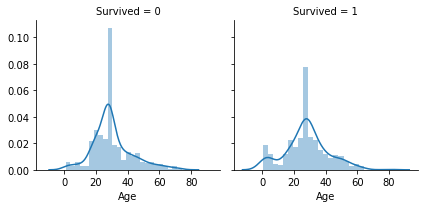

<Figure size 1440x648 with 0 Axes>

0: Died  1:Alive


In [23]:
a = sns.FacetGrid(titanic_df, col = "Survived")
a.map(sns.distplot, "Age", bins = 25)
plt.figure(figsize = (20,9))
plt.show()
print("0: Died  1:Alive")

### By the above graph, We can conclude that approx age of 30 are survived the most.


## Probability of Survivers based on ALONE or not

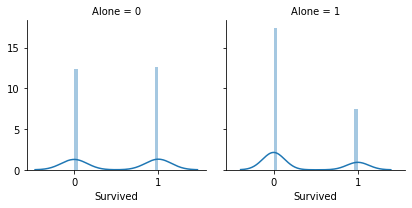

<Figure size 648x216 with 0 Axes>

0: Died  1:Alive


In [24]:
a = sns.FacetGrid(titanic_df, col = "Alone")
a.map(sns.distplot, "Survived", bins = 25)
plt.xticks(value_count.index, value_count.index.values)
plt.figure(figsize = (9,3))
plt.show()
print("0: Died  1:Alive")

### By the above figure, we can conclude that the people who are alone are survived the most.

## Probability of Survivers based on Embarked region.

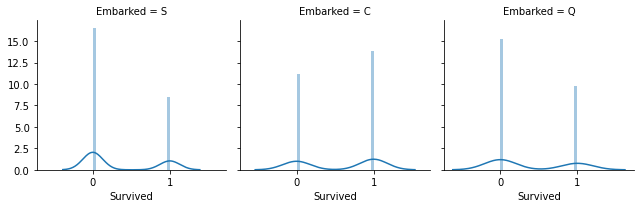

<Figure size 648x216 with 0 Axes>

0: Died  1:Alive


In [25]:
a = sns.FacetGrid(titanic_df, col = "Embarked")
a.map(sns.distplot, "Survived", bins = 25)
plt.xticks(value_count.index, value_count.index.values)
plt.figure(figsize = (9,3))
plt.show()
print("0: Died  1:Alive")

### Based on above figure, We can say that people from C survived the most compare than S and Q  
* (C =  Cherbourg, Q = Queenstown, S = Southampton)

##  Probability of Survivers based on SEX 

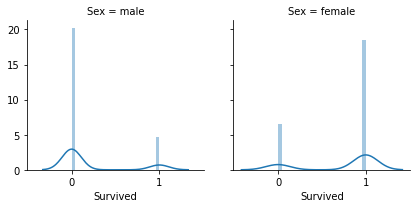

<Figure size 648x216 with 0 Axes>

0: Died  1:Alive


In [26]:
a = sns.FacetGrid(titanic_df, col = "Sex")
a.map(sns.distplot, "Survived", bins = 25)
plt.xticks(value_count.index, value_count.index.values)
plt.figure(figsize = (9,3))
plt.show()
print("0: Died  1:Alive")

### Based on above figure, We can say that Females are safe more tham men.

# CONCLUSION

* People who are in 1st class are more survived than other 2nd and 3rd class passengers.
* Passengers age whao are less tahn 30 are survied most.
* Passengers who are alone are *NOT* survived than passerger who are with family.
* Passengers who are from Cherbourg port are more survived than other port.



